In [12]:
import os
import re
import subprocess
import pandas as pd
import nltk

os.environ["TWITTER_TOKEN"] = "229711540a3513a8c04d79f72d7c7b87d96c8347"
subprocess.run(["pip", "install", "pandas"])
try:
    subprocess.run(["node", "-v"], check=True)
except:
    exit()

In [13]:
# === KONFIGURASI SCRAPING ===
filename = "FAM_Malaysia.csv"
search_keyword = "FAM Malaysia lang:id -filter:retweets"
limit = 1000
twitter_auth_token = os.getenv("TWITTER_TOKEN")

cmd = f'npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab LATEST -l {limit} --token {twitter_auth_token}'
subprocess.run(cmd, shell=True)

CompletedProcess(args='npx -y tweet-harvest@2.6.1 -o "FAM_Malaysia.csv" -s "FAM Malaysia lang:id -filter:retweets" --tab LATEST -l 1000 --token 229711540a3513a8c04d79f72d7c7b87d96c8347', returncode=0)

In [19]:
import pandas as pd
import os

# === CEK DUPLIKASI DATA ===
file_path = r"D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\tweets-data\FAM_Malaysia.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)

    # cek kolom teks utama
    kolom_teks = "full_text" if "full_text" in df.columns else "text"
    total_data = len(df)
    total_unik = df[kolom_teks].nunique()
    total_duplikat = total_data - total_unik

    print("=== HASIL PENGECEKAN DUPLIKASI ===")
    print(f"Total data        : {total_data}")
    print(f"Total data unik   : {total_unik}")
    print(f"Jumlah duplikasi  : {total_duplikat}")

    if total_duplikat > 0:
        duplikat_df = df[df.duplicated(subset=[kolom_teks], keep=False)]
        print("\n🔍 Contoh data duplikat:")
        print(duplikat_df.head(5)[[kolom_teks]])

        # === HAPUS DUPLIKASI ===
        df_bersih = df.drop_duplicates(subset=[kolom_teks], keep="first")
        df_bersih.to_csv(file_path, index=False, encoding="utf-8-sig")
        df = df_bersih

        print(f"\n Duplikasi berhasil dihapus. File tersimpan ulang di:\n{file_path}")
        print(f"Total data setelah dibersihkan: {len(df_bersih)}")
    else:
        print("\n Tidak ditemukan data duplikat.")
else:
    print("⚠️ File 'FAM_Malaysia.csv' tidak ditemukan.")


=== HASIL PENGECEKAN DUPLIKASI ===
Total data        : 1016
Total data unik   : 1016
Jumlah duplikasi  : 0

 Tidak ditemukan data duplikat.


In [21]:
# == CASE FOLDING ==
df = pd.read_csv(r'D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\tweets-data\FAM_Malaysia.csv')
if "full_text" in df.columns:
    df["text_casefolded"] = df["full_text"].astype(str).str.lower()
    df.to_csv('FAM_Malaysia_Proccessed.csv', index=False)
    print(f"Scraping selesai")
else:
    print("kolom 'full_text' tidak ditemukan dalam hasil scraping.")


Scraping selesai


In [23]:
# == Text Preprocessing ==
import os
import re
import subprocess
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [25]:
file_path = r'D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\FAM_Malaysia_Proccessed.csv'
df = pd.read_csv(file_path)

# 1. Text Filtering / Stopwords REemoval
stop_words = set(stopwords.words('indonesian'))
data_cleaned = []
filtered_data = []

for kalimat in df['text_casefolded']:
    text = re.sub(r'[^a-zA-Z\s]', '', kalimat.lower())
    filtered = [w for w in text.split() if w not in stopwords.words('indonesian')]
    filtered_data.append(filtered)
    data_cleaned.append(text)

df["stopwords_removal"] = data_cleaned
df.to_csv(file_path, index=False, encoding='utf-8-sig')
print(f"Scraping selesai")


Scraping selesai


In [26]:
# 2. Tokenizing
file_path = r'D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\FAM_Malaysia_Proccessed.csv'
df = pd.read_csv(file_path)

tokenize_text = []
for kalimat in df['stopwords_removal']:
    token = word_tokenize(kalimat.lower())
    tokenize_text.append(token)

df['tokenize_text'] = tokenize_text
df.to_csv(file_path, index=False, encoding='utf-8-sig')


In [27]:
# 3. Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
file_path = r'D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\FAM_Malaysia_Proccessed.csv'
df = pd.read_csv(file_path)

stemmer = StemmerFactory()
sf = stemmer.create_stemmer()
stemmed_text = []
for i in range(len(df)):
    word = str(df.loc[i,    'tokenize_text'])
    stemming = sf.stem(word)
    results = stemmed_text.append(stemming)
    df['stemmed_text'] = results

df['stemmed_text'] = stemmed_text
df.to_csv(file_path, index=False, encoding='utf-8-sig')


In [28]:
# === 4. N-GRAM (Bi-gram dan Tri-gram) ===
from nltk import ngrams

file_path = r'D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\FAM_Malaysia_Proccessed.csv'
df = pd.read_csv(file_path)

# pastikan kolom 'stemmed_text' ada
if 'stemmed_text' in df.columns:
    bigrams_list = []
    trigrams_list = []

    for kalimat in df['stemmed_text']:
        tokens = re.findall(r'\b\w+\b', kalimat.lower())
        bigram = [' '.join(gram) for gram in ngrams(tokens, 2)] if len(tokens) >= 2 else []
        trigram = [' '.join(gram) for gram in ngrams(tokens, 3)] if len(tokens) >= 3 else []

        bigrams_list.append(bigram)
        trigrams_list.append(trigram)

    df['bi_gram'] = bigrams_list
    df['tri_gram'] = trigrams_list

    # simpan hasil n-gram ke file yang sama
    df.to_csv(file_path, index=False, encoding='utf-8-sig')
    print(" Bi-gram dan Tri-gram berhasil ditambahkan ke file.")
else:
    print(" Kolom 'stemmed_text' belum tersedia. Jalankan proses stemming terlebih dahulu.")


 Bi-gram dan Tri-gram berhasil ditambahkan ke file.


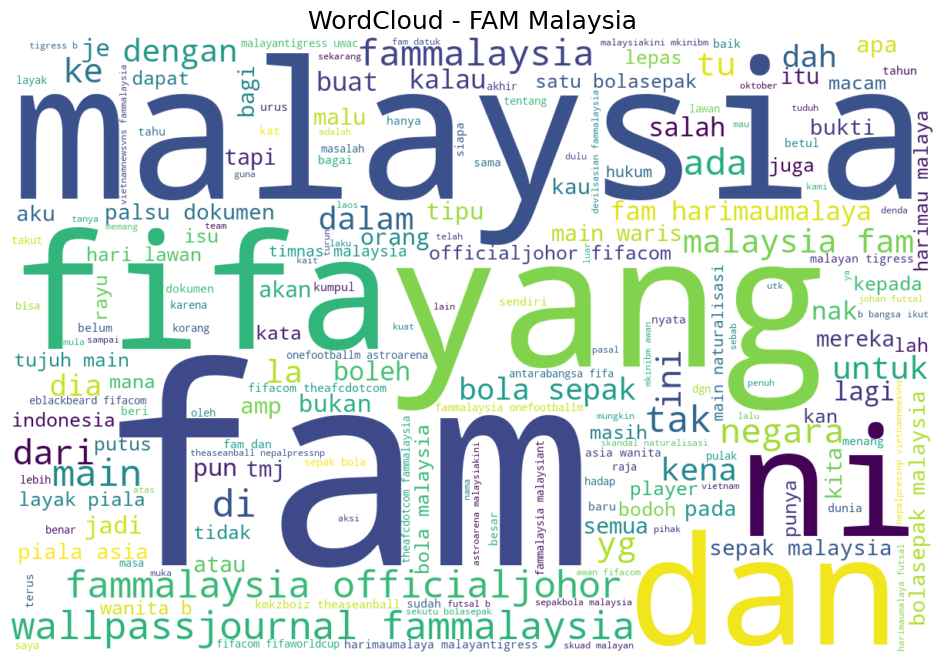

In [32]:
# === 5. WORDCLOUD VISUALIZATION ===
from wordcloud import WordCloud
import matplotlib.pyplot as plt

file_path = r'D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\FAM_Malaysia_Proccessed.csv'
df = pd.read_csv(file_path)

if 'stemmed_text' in df.columns:
    all_text = ' '.join(df['stemmed_text'].astype(str))

    # buat wordcloud
    wordcloud = WordCloud(
        width=1200,
        height=800,
        background_color='white',
        max_words=200,
        colormap='viridis'
    ).generate(all_text)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("WordCloud - FAM Malaysia", fontsize=18)
    plt.show()
else:
    os._exit()

output_path = r"D:\bgx\Pemrosesan Teks\Scraping_CaseFolding\CPMK2\FAM_Malaysia_WordCloud.png"
wordcloud.to_file(output_path)
